# Machine Learning: Sentiment Analysis
#### Joshua Greenert
#### DSC550-T301 Data Mining
#### 9/15/2022

## Part 1

In [9]:
# Load the libraries
import numpy as np
import pandas as pd
from textblob import TextBlob

bagOfWords = pd.read_csv('labeledTrainData.tsv', sep='\t')
bagOfWords.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [10]:
# Split this into a training and test set.
from sklearn.model_selection import train_test_split

train, test = train_test_split(bagOfWords)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = train['review']

# Vectorize the corpus.
vectorizer = TfidfVectorizer()
train_tf_idf = vectorizer.fit_transform(corpus)

train_tf_idf.shape

(18750, 66591)

In [8]:
# Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = test['review']

# Vectorize the corpus.
vectorizer = TfidfVectorizer()
test_tf_idf = vectorizer.fit_transform(corpus)

'''
The reason that we shouldn't perform a fit to our test set usually stems from using the test set to 
cross-validate our training set.  This can skew results and impair our dataset from useful testing processes.
'''
test_tf_idf.shape

(6250, 42626)

In [38]:
# Train a logistic regression using the training data.
from sklearn.linear_model import LogisticRegression

target = train.sentiment
features = train_tf_idf

# Create the logistic regression.
logistic_regression = LogisticRegression(random_state = 0)

# Create the model from the features and target.
model = logistic_regression.fit(features, target)

In [47]:
# Find the model accuracy on test set.
from sklearn.metrics import accuracy_score

target = test.sentiment
features = test_tf_idf

# Create the logistic regression.
logistic_regression = LogisticRegression(random_state = 0)

# Create the model from the features and target.
model = logistic_regression.fit(features, target)

# Create the predictions from the model.
predictions = model.predict(test_tf_idf)

# Create the score from the predictions.
score = accuracy_score(target,predictions)

score

0.89264

In [51]:
# Create a confusion matrix for the test set predictions.
from sklearn import metrics

# Create the confusion matrix based on acutal and predicted values.
confusion_matrix = metrics.confusion_matrix(target, predictions)
confusion_matrix

array([[2771,  344],
       [ 327, 2808]], dtype=int64)

In [60]:
# Get the precision, recall, and F1-score for the test set predictions.
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Create the metrics
precision = precision_score(target, predictions, average='binary')
recall = recall_score(target, predictions, average='binary')
f1score = f1_score(target, predictions, average='binary')

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1score}")

Precision: 0.8908629441624365
Recall: 0.8956937799043062
F1 score: 0.8932718307618897


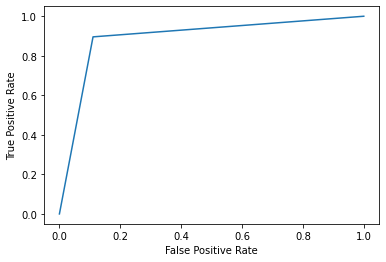

In [65]:
# Create a ROC curve for the test set.
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Create the roc curve from the y test and predictions.
fpr, tpr, _ = roc_curve(target,  predictions)

# Plot the roc curve.
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Part 2

In [66]:
# Pick another classification model you learned about this week and repeat steps (5) – (9).
from sklearn.tree import DecisionTreeClassifier

# Create the classifier.
decision_tree = DecisionTreeClassifier()

target = train.sentiment
features = train_tf_idf

# Create the model from the features and target.
model = decision_tree.fit(features, target)

In [69]:
# Find the model accuracy on test set.
test_target = test.sentiment
test_features = test_tf_idf

# Create the model from the features and target.
test_model = decision_tree.fit(test_features, test_target)

# Create the predictions from the model.
test_predictions = test_model.predict(test_tf_idf)

# Create the score from the predictions.
test_score = accuracy_score(test_target,test_predictions)

test_score

0.99936

In [71]:
# Create a confusion matrix for the test set predictions.
confusion_matrix = metrics.confusion_matrix(test_target, test_predictions)
confusion_matrix

array([[3115,    0],
       [   4, 3131]], dtype=int64)

In [72]:
# Get the precision, recall, and F1-score for the test set predictions.

# Create the metrics
precision = precision_score(test_target, test_predictions, average='binary')
recall = recall_score(test_target, test_predictions, average='binary')
f1score = f1_score(test_target, test_predictions, average='binary')

# Print the metrics
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 score: {f1score}")

Precision: 1.0
Recall: 0.9987240829346092
F1 score: 0.999361634216406


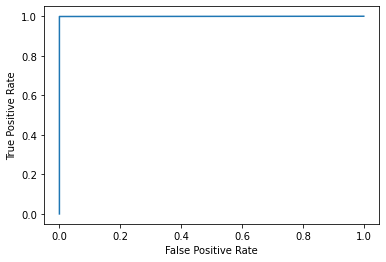

In [73]:
# Create a ROC curve for the test set.

# Create the roc curve from the y test and predictions.
fpr, tpr, _ = roc_curve(test_target,  test_predictions)

# Plot the roc curve.
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()